In [1]:
import numpy as np
import argparse
import os, time


from pykin.utils import plot_utils as p_utils


from pytamp.benchmark import Rearrange1
from pytamp.benchmark.rearrange1 import make_scene
from pytamp.search.mcts_for_rearragement import MCTS_rearrangement

def get_parser():
    parser = argparse.ArgumentParser(description="Test Rearragement 1.")
    parser.add_argument("--budgets", metavar="T", type=int, default=100, help="Horizon")
    parser.add_argument("--max_depth", metavar="H", type=int, default=10, help="Max depth")
#     parser.add_argument("--seed", metavar="i", type=int, default=7, help="A random seed")
    parser.add_argument("--seed", metavar="i", type=int, default=144, help="A random seed")
    parser.add_argument(
        "--algo",
        metavar="alg",
        type=str,
        default="bai_perturb",
        choices=["bai_perturb", "bai_ucb", "uct", "random", "greedy"],
        help="Choose one (bai_perturb, bai_ucb, uct)",
    )
    parser.add_argument(
        "--debug_mode", default=False, type=lambda x: (str(x).lower() == "true"), help="Debug mode"
    )
#     parser.add_argument("--box_number", metavar="N", type=int, default=6, help="Box Number(6 or less)")
    try:
        args = parser.parse_args() #call from command line
    except:
        args = parser.parse_args(args=[]) #call from notebook
    return args 

args = get_parser() 

debug_mode = args.debug_mode
budgets = args.budgets
max_depth = args.max_depth
algo = args.algo
seed = args.seed
np.random.seed(seed)

object_names, init_scene, goal_scene = make_scene()
rearrangement1 = Rearrange1('doosan', object_names, init_scene, goal_scene, is_pyplot=False)

final_level_1_values = []
final_level_2_values = []
final_optimal_nodes = []
final_pnp_all_joint_paths = []
final_pick_all_objects = []
final_place_all_object_poses = []

# final_optimal_trees = []
c_list = 10 ** np.linspace(-2, 2.0, 10)


usage: ipykernel_launcher.py [-h] [--budgets T] [--max_depth H] [--seed i]
                             [--algo alg] [--debug_mode DEBUG_MODE]
ipykernel_launcher.py: error: unrecognized arguments: -f /home/juju/.local/share/jupyter/runtime/kernel-5428bd61-8f24-40f8-9628-4a168e05e430.json


*********************** Logical States ***********************
OrderedDict([('ben_cube0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('can1',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('milk0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('cereal0',
              {'on': Object(name=table, pos=[ 0.9   -0.6    0.043])}),
             ('table',
              {'static': True,
               'support': [Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
                           Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
                           Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]),
                           Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]),
                           Object(name=cereal0, pos=[0.4

# Start Scene 

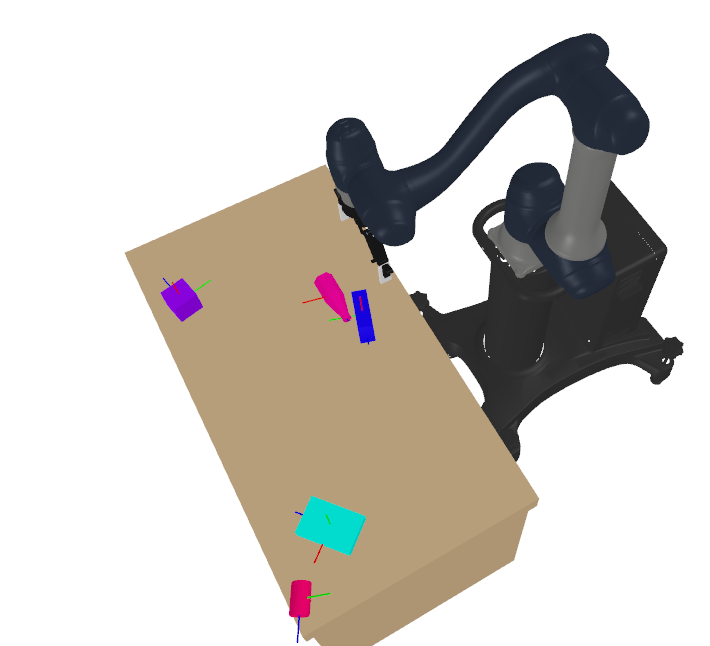

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]), 'can0': Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]), 'can1': Object(name=can1, pos=[0.76977701 0.03858527 0.83512874]), 'milk0': Object(name=milk0, pos=[ 0.48530145 -0.34550815  0.83236691]), 'cereal0': Object(name=cereal0, pos=[0.43695543 0.12948806 0.88526188])}


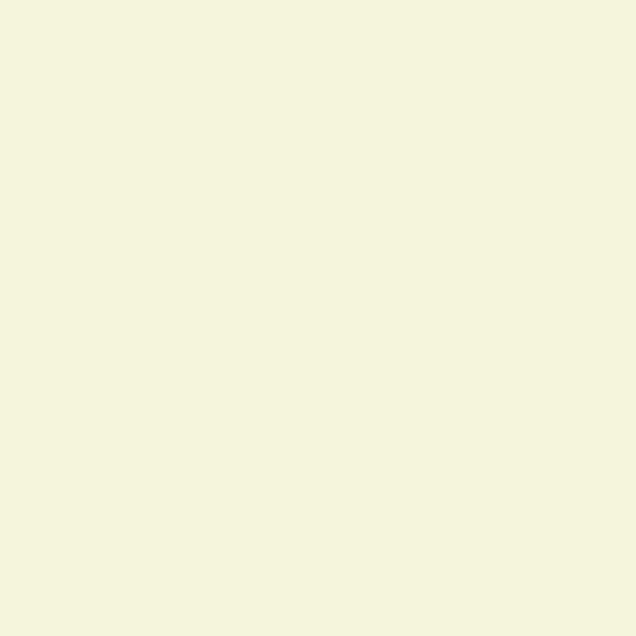

In [2]:
#######################
fig, ax = p_utils.init_3d_figure(name="Rearrangement 1")
# init_scene
rearrangement1.scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.scene_mngr)
# rearrangement1.render_axis_2(rearrangement1.scene_mngr)
rearrangement1.scene_mngr.show()

# Goal Scene 

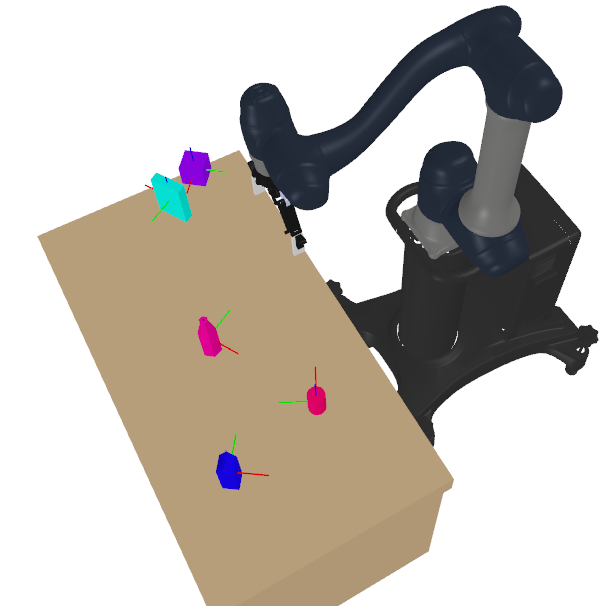

In [3]:
# goal_scene
rearrangement1.goal_scene_mngr.render_scene(ax)
rearrangement1.render_axis(rearrangement1.goal_scene_mngr)
rearrangement1.goal_scene_mngr.show()

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.5356105  0.17191691 0.84779998]), 'can0': Object(name=can0, pos=[0.29896213 0.01771398 0.85059666]), 'can1': Object(name=can1, pos=[ 0.4043516  -0.157966    0.85059666]), 'milk0': Object(name=milk0, pos=[ 0.44086927 -0.03354331  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.42959145 -0.33381047  0.88526188])}


In [4]:
c = 2.5
idx = 0
mcts = MCTS_rearrangement(
        scene_mngr=rearrangement1.scene_mngr,
        init_scene=rearrangement1.init_scene,
        sampling_method=args.algo,
        budgets=args.budgets,
        max_depth=args.max_depth,
        c=c,
        debug_mode=args.debug_mode,
    )
mcts.only_optimize_1 = False

In [5]:
start_time = time.time()
for i in range(budgets):
    print(
        f"\n[{idx+1}/{len(c_list)}] Benchmark: {rearrangement1.scene_mngr.scene.bench_num}, Algo: {algo}, C: {c}, Seed: {seed}"
    )
    mcts.do_planning_rearrange(i)

    print("########### Running time : ", time.time()- start_time, "##############")
    final_level_1_values.append(mcts.values_for_level_1)



[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 1 ===========
[Action] Rearr ben_cube0
Good Action
[Reward] S(0) -> A(2) -> S'(9) Reward : 10.0
[Action] Rearr can0
placed another place not goal
[Reward] S(9) -> A(10) -> S'(17) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(17) -> A(18) -> S'(24) Reward : -6.667
[Action] Rearr can1
Good Action
[Reward] S(24) -> A(28) -> S'(32) Reward : 4.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(32) -> A(33) -> S'(40) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(40) -> A(44) -> S'(47) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(47) -> A(48) -> S'(55) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(55) -> A(59) -> S'(63) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(63) -> A(66) -> S'(70) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(70) -> A(73) -> S'(7

[Action] Rearr cereal0
placed another place not goal
[Reward] S(356) -> A(362) -> S'(364) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(364) -> A(366) -> S'(372) Reward : 5.0
[Action] Rearr can1
placed another place not goal
[Reward] S(372) -> A(375) -> S'(381) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(381) -> A(388) -> S'(389) Reward : 3.333
[Action] Rearr milk0
Good Action
[Reward] S(389) -> A(396) -> S'(397) Reward : 2.857
[Action] Rearr ben_cube0
Bad Action
[Reward] S(397) -> A(398) -> S'(404) Reward : -2.857
[Action] Rearr milk0
Bad Action
[Reward] S(404) -> A(409) -> S'(411) Reward : -2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(411) -> A(412) -> S'(418) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(418) -> A(420) -> S'(426) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  11.178245782852173 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration :

[Action] Rearr cereal0
placed another place not goal
[Reward] S(697) -> A(702) -> S'(703) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(703) -> A(704) -> S'(711) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(711) -> A(717) -> S'(718) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(718) -> A(719) -> S'(725) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(725) -> A(729) -> S'(732) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(732) -> A(733) -> S'(740) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(740) -> A(742) -> S'(748) Reward : -1
Exceeded the maximum depth!!
########### Running time :  19.648115873336792 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 12 ===========
[Action] Rearr milk0
Good Action
[Reward] S(0) -> A(7) -> S'(427) Reward : 10.0
[Action] 

[Action] Rearr cereal0
Bad Action
[Reward] S(1008) -> A(1013) -> S'(1014) Reward : -2.857
[Action] Rearr ben_cube0
Good Action
[Reward] S(1014) -> A(1015) -> S'(1020) Reward : 2.222
[Action] Rearr can0
placed another place not goal
[Reward] S(1020) -> A(1021) -> S'(1027) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(1027) -> A(1030) -> S'(1033) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  27.77598214149475 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 17 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(211) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(211) -> A(214) -> S'(1034) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(1034) -> A(1037) -> S'(1042) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1042) -> A(1048) -> S'(1049) Reward : -1
[Action] Rearr can1
placed anothe

[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1320) -> A(1321) -> S'(1327) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(1327) -> A(1333) -> S'(1335) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1335) -> A(1337) -> S'(1343) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  35.93049168586731 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 22 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(211) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(211) -> A(216) -> S'(1344) Reward : 6.667
[Action] Rearr can1
placed another place not goal
[Reward] S(1344) -> A(1348) -> S'(1352) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1352) -> A(1354) -> S'(1359) Reward : 4.0
[Action] Rearr milk0
Bad Action
[Reward] S(1359) -> A(1364) -> S'(1367) Reward : -4.0
[Action] Rearr can0
placed another place n

[Action] Rearr can1
Good Action
[Reward] S(1618) -> A(1622) -> S'(1624) Reward : 2.0
[Action] Rearr can0
Good Action
[Reward] S(1624) -> A(1627) -> S'(1630) Reward : 1.818
##########['cereal0', 'milk0', 'ben_cube0', 'can1', 'can0']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  44.09625029563904 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 27 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(356) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(356) -> A(361) -> S'(1631) Reward : 6.667
[Action] Rearr ben_cube0
Good Action
[Reward] S(1631) -> A(1633) -> S'(1638) Reward : 5.0
[Action] Rearr cereal0
Good Action
[Reward] S(1638) -> A(1645) -> S'(1646) Reward : 4.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(1646) -> A(1647) -> S'(1653) Reward : -4.0
[Action] Rearr can1
Bad Action
[Reward] S(1653) -> A(1656) -> S'(1660) Reward : -3.333
[Action] Rea

[Action] Rearr cereal0
placed another place not goal
[Reward] S(1909) -> A(1914) -> S'(1916) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1916) -> A(1919) -> S'(1924) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  51.76195764541626 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 32 ===========
[Action] Rearr milk0
Good Action
[Reward] S(0) -> A(7) -> S'(427) Reward : 10.0
[Action] Rearr cereal0
Good Action
[Reward] S(427) -> A(434) -> S'(1925) Reward : 6.667
[Action] Rearr can1
Good Action
[Reward] S(1925) -> A(1930) -> S'(1932) Reward : 5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(1932) -> A(1935) -> S'(1938) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(1938) -> A(1941) -> S'(1944) Reward : -4.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1944) -> A(1945) -> S'(1950) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(1950) -> A(1952) -> S'(

[Action] Rearr cereal0
placed another place not goal
[Reward] S(2197) -> A(2203) -> S'(2204) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2204) -> A(2209) -> S'(2211) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(2211) -> A(2212) -> S'(2217) Reward : 3.333
[Action] Rearr cereal0
Good Action
[Reward] S(2217) -> A(2224) -> S'(2225) Reward : 2.857
[Action] Rearr can0
placed another place not goal
[Reward] S(2225) -> A(2227) -> S'(2232) Reward : -1
[Action] Rearr ben_cube0
Bad Action
[Reward] S(2232) -> A(2233) -> S'(2238) Reward : -2.5
[Action] Rearr can1
Bad Action
[Reward] S(2238) -> A(2241) -> S'(2243) Reward : -2.222
[Action] Rearr milk0
Good Action
[Reward] S(2243) -> A(2249) -> S'(2251) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  61.01038455963135 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 38 ===========
[Action] Rearr ben_cube0
placed another place no

placed another place not goal
[Reward] S(2315) -> A(2316) -> S'(2475) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2475) -> A(2478) -> S'(2483) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(2483) -> A(2490) -> S'(2491) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2491) -> A(2496) -> S'(2500) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(2500) -> A(2504) -> S'(2508) Reward : 2.5
[Action] Rearr ben_cube0
Good Action
[Reward] S(2508) -> A(2510) -> S'(2516) Reward : 2.222
[Action] Rearr can0
Bad Action
[Reward] S(2516) -> A(2517) -> S'(2522) Reward : -2.222
[Action] Rearr milk0
Good Action
[Reward] S(2522) -> A(2527) -> S'(2529) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  68.6032030582428 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 43 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0)

[Action] Rearr milk0
placed another place not goal
[Reward] S(2754) -> A(2758) -> S'(2761) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(2761) -> A(2767) -> S'(2768) Reward : 3.333
[Action] Rearr milk0
Good Action
[Reward] S(2768) -> A(2774) -> S'(2775) Reward : 2.857
[Action] Rearr can1
Bad Action
[Reward] S(2775) -> A(2779) -> S'(2781) Reward : -2.857
[Action] Rearr can0
placed another place not goal
[Reward] S(2781) -> A(2783) -> S'(2787) Reward : -1
[Action] Rearr can1
placed another place not goal
[Reward] S(2787) -> A(2789) -> S'(2793) Reward : -1
[Action] Rearr milk0
Bad Action
[Reward] S(2793) -> A(2797) -> S'(2799) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  76.1412832736969 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 48 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(211) Reward : -1
[Action] Rearr cereal0
placed another place not goal


Bad Action
[Reward] S(3007) -> A(3008) -> S'(3014) Reward : -5.0
[Action] Rearr can0
placed another place not goal
[Reward] S(3014) -> A(3015) -> S'(3022) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(3022) -> A(3027) -> S'(3030) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(3030) -> A(3032) -> S'(3039) Reward : 2.5
[Action] Rearr can0
placed another place not goal
[Reward] S(3039) -> A(3040) -> S'(3048) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(3048) -> A(3053) -> S'(3055) Reward : 2.0
[Action] Rearr ben_cube0
Bad Action
[Reward] S(3055) -> A(3056) -> S'(3063) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  83.40494132041931 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 53 ===========
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(0) -> A(1) -> S'(79) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(79) 

Good Action
[Reward] S(3277) -> A(3284) -> S'(3285) Reward : 4.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(3285) -> A(3292) -> S'(3293) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(3293) -> A(3294) -> S'(3300) Reward : 2.857
[Action] Rearr milk0
Good Action
[Reward] S(3300) -> A(3306) -> S'(3308) Reward : 2.5
[Action] Rearr can1
placed another place not goal
[Reward] S(3308) -> A(3312) -> S'(3315) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(3315) -> A(3317) -> S'(3320) Reward : 2.0
[Action] Rearr can1
Good Action
[Reward] S(3320) -> A(3323) -> S'(3326) Reward : 1.818
##########['cereal0', 'ben_cube0', 'milk0', 'can0', 'can1']#############
Success!!!!!
Terminal State! Reward is 5
########### Running time :  90.09655117988586 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 58 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(288) Reward : 10.0
[Action] Rearr milk0


[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(3546) -> A(3547) -> S'(3553) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(3553) -> A(3555) -> S'(3561) Reward : 2.857
[Action] Rearr milk0
Bad Action
[Reward] S(3561) -> A(3566) -> S'(3569) Reward : -2.857
[Action] Rearr ben_cube0
Good Action
[Reward] S(3569) -> A(3571) -> S'(3577) Reward : 2.222
[Action] Rearr can1
Good Action
[Reward] S(3577) -> A(3580) -> S'(3585) Reward : 2.0
[Action] Rearr milk0
Good Action
[Reward] S(3585) -> A(3588) -> S'(3591) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  97.44023060798645 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 63 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(288) Reward : 10.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(288) -> A(294) -> S'(2748) Reward : -1
[Action] Rearr can1
Bad Action
[Reward] S(2748) -> A(2751) -> S'(3592) Rewar

[Action] Rearr milk0
placed another place not goal
[Reward] S(3819) -> A(3824) -> S'(3828) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(3828) -> A(3831) -> S'(3836) Reward : -1
[Action] Rearr can1
Good Action
[Reward] S(3836) -> A(3840) -> S'(3845) Reward : 2.0
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(3845) -> A(3846) -> S'(3853) Reward : -1
Exceeded the maximum depth!!
########### Running time :  103.9513943195343 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 68 ===========
[Action] Rearr can1
placed another place not goal
[Reward] S(0) -> A(4) -> S'(211) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(211) -> A(215) -> S'(1159) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(1159) -> A(1160) -> S'(3854) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(3854) -> A(3856) -> S'(3863) Reward : 4.0
[Action] Rearr cerea

[Action] Rearr milk0
Bad Action
[Reward] S(4097) -> A(4102) -> S'(4104) Reward : -2.857
[Action] Rearr can1
Bad Action
[Reward] S(4104) -> A(4109) -> S'(4111) Reward : -2.5
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(4111) -> A(4112) -> S'(4119) Reward : -1
[Action] Rearr can0
Good Action
[Reward] S(4119) -> A(4121) -> S'(4127) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  111.75046229362488 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 73 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(288) Reward : 10.0
[Action] Rearr cereal0
placed another place not goal
[Reward] S(288) -> A(294) -> S'(2748) Reward : -1
[Action] Rearr milk0
placed another place not goal
[Reward] S(2748) -> A(2752) -> S'(4128) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(4128) -> A(4131) -> S'(4135) Reward : -1
[Action] Rearr ben_cube0
placed another place not 

[Action] Rearr can1
Good Action
[Reward] S(4369) -> A(4374) -> S'(4376) Reward : 2.222
[Action] Rearr cereal0
Bad Action
[Reward] S(4376) -> A(4381) -> S'(4382) Reward : -2.222
[Action] Rearr ben_cube0
Good Action
[Reward] S(4382) -> A(4384) -> S'(4388) Reward : 1.818
Exceeded the maximum depth!!
########### Running time :  119.53003811836243 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 78 ===========
[Action] Rearr milk0
placed another place not goal
[Reward] S(0) -> A(6) -> S'(356) Reward : -1
[Action] Rearr can0
placed another place not goal
[Reward] S(356) -> A(359) -> S'(1285) Reward : -1
[Action] Rearr ben_cube0
Good Action
[Reward] S(1285) -> A(1287) -> S'(4389) Reward : 5.0
[Action] Rearr milk0
placed another place not goal
[Reward] S(4389) -> A(4394) -> S'(4398) Reward : -1
[Action] Rearr cereal0
placed another place not goal
[Reward] S(4398) -> A(4404) -> S'(4406) Reward : -1
[Action] Rearr milk0
Good Action
[Reward]

[Action] Rearr cereal0
placed another place not goal
[Reward] S(4605) -> A(4610) -> S'(4611) Reward : -1
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(4611) -> A(4612) -> S'(4619) Reward : -1
[Action] Rearr milk0
Good Action
[Reward] S(4619) -> A(4624) -> S'(4626) Reward : 2.857
[Action] Rearr ben_cube0
placed another place not goal
[Reward] S(4626) -> A(4627) -> S'(4634) Reward : -1
[Action] Rearr cereal0
Good Action
[Reward] S(4634) -> A(4640) -> S'(4641) Reward : 2.222
[Action] Rearr can0
Good Action
[Reward] S(4641) -> A(4645) -> S'(4648) Reward : 2.0
[Action] Rearr cereal0
Bad Action
[Reward] S(4648) -> A(4653) -> S'(4654) Reward : -2.0
Exceeded the maximum depth!!
########### Running time :  126.76107692718506 ##############

[1/10] Benchmark: 0, Algo: bai_perturb, C: 2.5, Seed: 144
=========== Search iteration : 84 ===========
[Action] Rearr can1
Good Action
[Reward] S(0) -> A(5) -> S'(288) Reward : 10.0
[Action] Rearr milk0
placed another place not goal
[Rew

KeyboardInterrupt: 

In [6]:
max_level_1_value = mcts.get_max_value_level_1()
max_level_1_value

30.257142857142853

In [7]:
mcts.history_level_1_dict

{0: {'nodes': [0,
   6,
   356,
   360,
   1578,
   1585,
   1586,
   1593,
   1594,
   1599,
   1601,
   1604,
   1607,
   1610,
   1613,
   1614,
   1618,
   1622,
   1624,
   1627,
   1630],
  'value': 16.516594516594516},
 1: {'nodes': [0,
   4,
   211,
   212,
   922,
   923,
   1763,
   1768,
   1771,
   1777,
   1779,
   1785,
   1787,
   1794,
   1795,
   1796,
   1802,
   1804,
   1808,
   1810,
   1814],
  'value': 11.50865800865801},
 2: {'nodes': [0,
   4,
   211,
   213,
   979,
   980,
   2376,
   2381,
   2383,
   2390,
   2391,
   2392,
   2398,
   2399,
   2405,
   2409,
   2412,
   2414,
   2419,
   2421,
   2425],
  'value': 17.707070707070706},
 3: {'nodes': [0,
   6,
   356,
   362,
   364,
   365,
   3277,
   3284,
   3285,
   3292,
   3293,
   3294,
   3300,
   3306,
   3308,
   3312,
   3315,
   3317,
   3320,
   3323,
   3326],
  'value': 12.175324675324678},
 4: {'nodes': [0,
   5,
   288,
   293,
   2642,
   2646,
   4551,
   4556,
   4558,
   4559,
   4564,


In [18]:
########## level 1 ##########
if mcts.history_level_1_dict:
    j, max_value_nodes = mcts.get_max_value_nodes_level_1()
    print(f"Result {j} : ", max_value_nodes)
    print("state num :", len(max_value_nodes))
    mcts.render_rearr("_", max_value_nodes)

Result 5 :  [0, 5, 288, 293, 2642, 2647, 4585, 4587, 4591, 4597, 4598, 4601, 4604]
state num : 13


In [13]:
state_list = [i for _, i in enumerate(max_value_nodes) if not _ % 2]
action_list = [i for _, i in enumerate(max_value_nodes) if _ % 2]

In [14]:
state_list, action_list

([0, 288, 2642, 4585, 4591, 4598, 4604], [5, 293, 2647, 4587, 4597, 4601])

In [40]:
for i in range(len(max_value_nodes)//2):
    print("current state : ", max_value_nodes[2*i])
    print("action : ", max_value_nodes[2*i + 1])
    print("next state : ", max_value_nodes[2*(i+1)])
    
    print("manipulate object", mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
    current_state_pc, current_count = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[max_value_nodes[2*i]]['state'], mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
    next_state_pc, next_count = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'], mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'])
    
    print()
    
    if i>2:
        break
    

current state :  0
action :  5
next state :  288
manipulate object can1

current state :  288
action :  293
next state :  2642
manipulate object milk0

current state :  2642
action :  2647
next state :  4585
manipulate object cereal0

current state :  4585
action :  4587
next state :  4591
manipulate object ben_cube0



In [41]:

print(mcts.tree.nodes[max_value_nodes[2*i]]['state'].objs[mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']].h_mat)
print(mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'].objs[mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']].h_mat)

[[ 0.         -0.90181322 -0.43212604  0.30355822]
 [ 0.          0.43212604 -0.90181322  0.00852862]
 [ 1.          0.          0.          0.84779998]
 [ 0.          0.          0.          1.        ]]
[[-0.133875    0.99099823  0.          0.5356105 ]
 [-0.99099823 -0.133875    0.          0.17191691]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]


In [42]:
combined_pc = rearrangement1.get_combined_point_cloud(mcts.tree.nodes[max_value_nodes[2*i]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'],
                                        mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name'],
                                        current_state_pc,
                                        next_state_pc,
                                        next_count
                                       )

5000


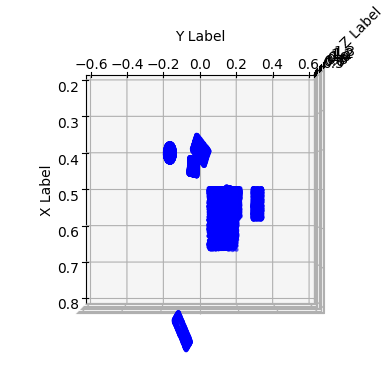

In [43]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  rearrangement1.get_support_space_point_cloud()

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_pc[:, 0], combined_pc[:, 1], combined_pc[:, 2], c='b', marker='.')
ax.set_xlim(.2,0.8)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()


In [44]:
from pykin.utils import mesh_utils as m_utils

# current obj -> next_scene obj 
cTn = m_utils.get_relative_transform(mcts.tree.nodes[max_value_nodes[2*i]]['state'].objs[mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']].h_mat,
       mcts.tree.nodes[max_value_nodes[2*(i+1)]]['state'].objs[mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']].h_mat)
cTn

array([[ 0.        ,  0.        ,  1.        ,  0.        ],
       [-0.30750589, -0.95154618,  0.        , -0.13866348],
       [ 0.95154618, -0.30750589,  0.        , -0.24762155],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])

In [45]:
mcts.tree.nodes[max_value_nodes[2*(i)]]['state'].objs, mcts.tree.nodes[max_value_nodes[2*i + 1]]['action']['rearr_obj_name']

({'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
  'ben_cube0': Object(name=ben_cube0, pos=[0.30355822 0.00852862 0.84779998]),
  'can0': Object(name=can0, pos=[0.39698326 0.00357495 0.83501831]),
  'can1': Object(name=can1, pos=[ 0.4043516  -0.157966    0.85059666]),
  'milk0': Object(name=milk0, pos=[ 0.44086927 -0.03354331  0.87809554]),
  'cereal0': Object(name=cereal0, pos=[ 0.87301896 -0.09254935  0.88526188])},
 'ben_cube0')

In [46]:
current_state_pc

o_arr = np.full((len(current_state_pc), 1), 1)
current_state_pc_h = np.hstack((current_state_pc, o_arr))

transformed_current_pc =  np.dot(current_state_pc_h, cTn[:3].T)
transformed_current_pc

array([[ 0.88529998, -0.2275991 ,  0.04721988],
       [ 0.86912021, -0.22019725, -0.00192715],
       [ 0.85703812, -0.21809468, -0.00221119],
       ...,
       [ 0.96010673, -0.28007764,  0.60388239],
       [ 0.95214137, -0.30203801,  0.61862221],
       [ 0.930368  , -0.30535379,  0.58533033]])

In [47]:
milk_current_mean = np.array([np.mean(transformed_current_pc[1000*(current_count):1000*(current_count+1)][:,0]), np.mean(transformed_current_pc[1000*(current_count):1000*(current_count+1)][:,1]), np.mean(transformed_current_pc[1000*(current_count):1000*(current_count+1)][:,2])])
transformed_current_pc, milk_current_mean

(array([[ 0.88529998, -0.2275991 ,  0.04721988],
        [ 0.86912021, -0.22019725, -0.00192715],
        [ 0.85703812, -0.21809468, -0.00221119],
        ...,
        [ 0.96010673, -0.28007764,  0.60388239],
        [ 0.95214137, -0.30203801,  0.61862221],
        [ 0.930368  , -0.30535379,  0.58533033]]),
 array([ 0.84701031, -0.23864406,  0.03845587]))

In [48]:
milk_next_mean = np.array([np.mean(next_state_pc[1000*(current_count):1000*(current_count+1)][:,0]), np.mean(next_state_pc[1000*(current_count):1000*(current_count+1)][:,1]),  np.mean(next_state_pc[1000*(current_count):1000*(current_count+1)][:,2])])
next_state_pc, milk_next_mean

(array([[ 0.51928653,  0.17399936,  0.88529998],
        [ 0.5012266 ,  0.13872123,  0.82928108],
        [ 0.52571938,  0.16947586,  0.88529998],
        ...,
        [ 0.85194895, -0.12993387,  0.92494681],
        [ 0.89452958, -0.05480465,  0.82599171],
        [ 0.85037821, -0.12939211,  0.81029998]]),
 array([0.53475389, 0.17350673, 0.84820679]))

In [49]:
transition_xy = milk_next_mean - milk_current_mean
transition_xy

array([-0.31225642,  0.41215078,  0.80975091])

5000


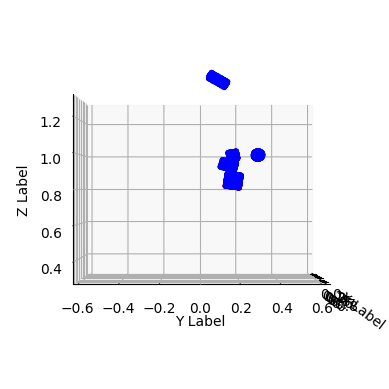

In [56]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  rearrangement1.get_support_space_point_cloud()

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(transformed_current_pc))

transformed_current_pc_2 = transformed_current_pc + transition_xy

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_current_pc_2[:, 0], transformed_current_pc_2[:, 1], transformed_current_pc_2[:, 2], c='b', marker='.')
ax.scatter(transformed_current_pc_2[1000*current_count:1000*(current_count+1), 0], transformed_current_pc_2[1000*current_count:1000*(current_count+1), 1], transformed_current_pc_2[1000*current_count:1000*(current_count+1), 2], c='r', marker='.')
ax.set_xlim(-0.,0.8)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.3,1.3)


ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=0, azim=0)

plt.show()


5000


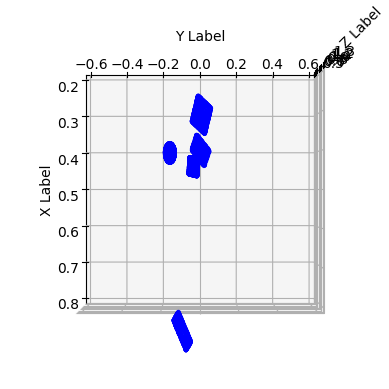

In [51]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  rearrangement1.get_support_space_point_cloud()

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(current_state_pc))

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(current_state_pc[:, 0], current_state_pc[:, 1], current_state_pc[:, 2], c='b', marker='.')
ax.set_xlim(.2,0.8)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()


5000


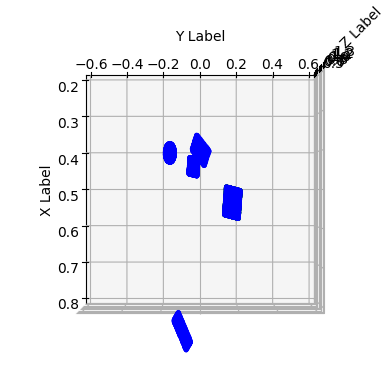

In [52]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  rearrangement1.get_support_space_point_cloud()

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(next_state_pc[1000*current_count:1000*(current_count+1), 0], next_state_pc[1000*current_count:1000*(current_count+1), 1], next_state_pc[1000*current_count:1000*(current_count+1), 2], c='g', marker='.')
ax.scatter(next_state_pc[:, 0], next_state_pc[:, 1], next_state_pc[:, 2], c='b', marker='.')
ax.set_xlim(.2,0.8)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.5,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()


## Combined PC

5000


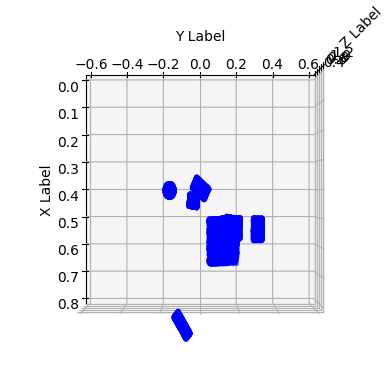

In [61]:
##### %matplotlib inline
import trimesh
from trimesh.util import concatenate

# table_point_cloud =  rearrangement1.get_support_space_point_cloud()

# # obj_point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[1936]['state'])
# point_clouds = rearrangement1.get_obj_point_clouds(mcts.tree.nodes[311]['state'])

# point_clouds = np.vstack((point_clouds, table_point_cloud))
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
print(len(next_state_pc))

combined_pc = np.vstack([next_state_pc, transformed_current_pc_2])

# matplotlib으로 point cloud 시각화하기
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(combined_pc[:, 0], combined_pc[:, 1], combined_pc[:, 2], c='b', marker='.')
ax.set_xlim(-0.,0.8)
ax.set_ylim(-.6,0.6)
ax.set_zlim(0.3,1.3)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.view_init(elev=90, azim=0)

plt.show()


In [253]:
len(combined_pc)

10000

In [14]:
idx = 0
val_ = -np.inf
for k,v in mcts.history_level_1_dict.items():
    if val_ < v['value']:
        idx = k
        val_ = v['value']
        
max_value_nodes = mcts.history_level_1_dict[2]['nodes']
mcts.render_rearr("_", max_value_nodes)
# idx, max_value_nodes

In [3]:
mcts.do_planning_rearrange(0)

mcts.visualize_tree("Siccess nodes", mcts.tree)

=========== Search iteration : 1 ===========
Possible action :  [{'table': array([[-0.65439006, -0.75615716,  0.        ,  0.81258534],
       [ 0.75615716, -0.65439006,  0.        ,  0.59000015],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'table': array([[-0.85692728, -0.51543732,  0.        ,  0.60659851],
       [ 0.51543732, -0.85692728,  0.        ,  0.38424777],
       [ 0.        ,  0.        ,  1.        ,  0.84779998],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]
Possible action :  [{'table': array([[ 0.49456394, -0.86914125,  0.        ,  0.69975171],
       [ 0.86914125,  0.49456394,  0.        ,  0.56444204],
       [ 0.        ,  0.        ,  1.        ,  0.85059666],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]
Possible action :  [{'table': array([[ 0.91856648, -0.39526653,  0.        ,  0.32757333],
       [ 0.39526653,  0.91856648,  0.        ,  0.338

KeyError: 'place_obj_name'

In [19]:
mcts.rearr_action.scene_mngr.init_scene.objs

{'table': Object(name=table, pos=[ 0.9   -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[ 0.51224777 -0.30205152  0.84779998]),
 'can0': Object(name=can0, pos=[0.52298875 0.45872414 0.85059666]),
 'can1': Object(name=can1, pos=[0.57888044 0.07873193 0.83516771]),
 'milk0': Object(name=milk0, pos=[ 0.82293572 -0.52496244  0.83236691]),
 'cereal0': Object(name=cereal0, pos=[ 0.4360076  -0.25732616  0.86029978])}

# Scene collision info 

In [ ]:
col_info = {}

def get_h_mat(position=np.zeros(3), orientation=np.array([1.0, 0.0, 0.0, 0.0])):
    """
    Returns homogeneous matrix from position and orientation
    """
    position = np.asarray(position)
    orientation = np.asarray(orientation)
    if orientation.shape == (3,):  # RPY Euler angles
        R = get_matrix_from_rpy(orientation)
    elif orientation.shape == (4,):  # quaternion in the form [x,y,z,w]
        R = get_matrix_from_quaternion(orientation)
    elif orientation.shape == (3, 3):  # Rotation matrix
        R = orientation

    H = np.vstack((np.hstack((R, position.reshape(-1, 1))), np.array([[0, 0, 0, 1]])))
    return H

for name, info in mcts.init_scene.collision_manager._objs.items():
    T = get_h_mat(
        position=info["obj"].getTranslation(),
        orientation=info["obj"].getRotation(),
    )
    col_info[name] = T

# Collision check

In [14]:
idx = 4148
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'milk0': array([[ 0.96655143, -0.25647288,  0.        ,  0.88596138],
       [ 0.25647288,  0.96655143,  0.        , -0.40701088],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'milk0': array([[ 0.49220865,  0.87047725,  0.        ,  0.81366052],
       [-0.87047725,  0.49220865,  0.        ,  0.0371563 ],
       [ 0.        ,  0.        ,  1.        ,  0.87809554],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [15]:
idx = 4153
try:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action']['rearr_poses'])
except:
    print(mcts.tree.nodes[idx]['state'].objs), print(mcts.tree.nodes[idx]['action'])


{'table': Object(name=table, pos=[ 1.    -0.6    0.043]), 'ben_cube0': Object(name=ben_cube0, pos=[0.70176068 0.39897795 0.84779998]), 'bottle0': Object(name=bottle0, pos=[0.9662838  0.26164643 0.83593754]), 'can0': Object(name=can0, pos=[ 0.69793541 -0.27222775  0.85059666]), 'milk0': Object(name=milk0, pos=[0.81366052 0.0371563  0.87809554]), 'cereal0': Object(name=cereal0, pos=[ 0.40749753 -0.09764542  0.88526188])}
[{'bottle0': array([[-0.14103772,  0.99000422,  0.        ,  0.82751786],
       [-0.99000422, -0.14103772,  0.        , -0.4207895 ],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}, {'bottle0': array([[-0.05088925, -0.9987043 ,  0.        ,  0.62542366],
       [ 0.9987043 , -0.05088925,  0.        , -0.24336767],
       [ 0.        ,  0.        ,  1.        ,  0.87515735],
       [ 0.        ,  0.        ,  0.        ,  1.        ]])}]


In [23]:
mcts.render_rearr_state( None,title =  '_', state = mcts.tree.nodes[idx]['state'])

In [25]:
mcts.scene_mngr.scene.objs

{'table': Object(name=table, pos=[ 1.    -0.6    0.043]),
 'ben_cube0': Object(name=ben_cube0, pos=[0.7449755  0.50675499 0.84779998]),
 'bottle0': Object(name=bottle0, pos=[ 0.74971138 -0.29269512  0.83593753]),
 'can0': Object(name=can0, pos=[0.58752796 0.31872161 0.83500836]),
 'milk0': Object(name=milk0, pos=[ 0.47826872 -0.11880885  0.83236691])}

In [24]:
idx, list(mcts.rearr_action.get_goal_location_not_collision(mcts.tree.nodes[idx]['state'],mcts.tree.nodes[idx]['action']['rearr_poses']))

(862,
 [{'can0': array([[ 0.71035039, -0.70384822,  0.        ,  0.7415683 ],
          [ 0.70384822,  0.71035039,  0.        , -0.55474858],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])},
  {'can0': array([[-0.17171101,  0.98514736,  0.        ,  0.83996994],
          [-0.98514736, -0.17171101,  0.        , -0.27054348],
          [ 0.        ,  0.        ,  1.        ,  0.85059666],
          [ 0.        ,  0.        ,  0.        ,  1.        ]])}])

In [47]:
mcts.scene_mngr.obj_collision_mngr.get_collision_info()

{'table': array([[ 1.   ,  0.   ,  0.   ,  1.   ],
        [ 0.   ,  1.   ,  0.   , -0.6  ],
        [ 0.   ,  0.   ,  1.   ,  0.043],
        [ 0.   ,  0.   ,  0.   ,  1.   ]]),
 'ben_cube0': array([[ 0.        ,  0.78165694, -0.62370861,  0.84763533],
        [ 0.        ,  0.62370861,  0.78165694,  0.36753831],
        [ 1.        ,  0.        ,  0.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle0': array([[-0.65291822,  0.75742841,  0.        ,  0.83010826],
        [-0.75742841, -0.65291822,  0.        , -0.20864996],
        [ 0.        ,  0.        ,  1.        ,  0.87515735],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'ben_cube1': array([[-0.17287648,  0.98494351,  0.        ,  0.49591774],
        [ 0.98494351,  0.17287648,  0.        ,  0.45601634],
        [ 0.        ,  0.        , -1.        ,  0.84779998],
        [ 0.        ,  0.        ,  0.        ,  1.        ]]),
 'bottle1': array([[-0.81254636,  

In [18]:
for name, obj in mcts.rearr_action.scene_mngr.scene.objs.items():
    print(name, obj.h_mat)

table [[ 1.     0.     0.     1.   ]
 [ 0.     1.     0.    -0.6  ]
 [ 0.     0.     1.     0.043]
 [ 0.     0.     0.     1.   ]]
ben_cube0 [[-0.34614189 -0.93818217  0.          0.46298891]
 [ 0.93818217 -0.34614189  0.          0.02937996]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle0 [[-0.65291822  0.75742841  0.          0.83010826]
 [-0.75742841 -0.65291822  0.         -0.20864996]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
ben_cube1 [[-0.19514173  0.98077505  0.          0.96563102]
 [-0.98077505 -0.19514173  0.          0.29412445]
 [ 0.          0.          1.          0.84779998]
 [ 0.          0.          0.          1.        ]]
bottle1 [[-0.81254636  0.58289657  0.          0.38289801]
 [-0.58289657 -0.81254636  0.          0.37264649]
 [ 0.          0.          1.          0.87515735]
 [ 0.          0.          0.          1.        ]]
